In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [2]:
# df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2678,ham,Was playng 9 doors game and gt racing on phone...,NaN,NaN,NaN
1737,ham,I cant pick the phone right now. Pls send a me...,NaN,NaN,NaN
2513,spam,U have won a nokia 6230 plus a free digital ca...,NaN,NaN,NaN
4596,ham,Full heat pa:-) i have applyed oil pa.,NaN,NaN,NaN
1118,ham,I'm going 4 lunch now wif my family then aft d...,NaN,NaN,NaN
4735,ham,"Not for possession, especially not first offense",NaN,NaN,NaN
989,ham,Ugh. Gotta drive back to sd from la. My butt i...,NaN,NaN,NaN
2933,ham,Yup n her fren lor. I'm meeting my fren at 730.,NaN,NaN,NaN
3599,ham,I know you mood off today,NaN,NaN,NaN
5034,ham,How many times i told in the stage all use to ...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.isnull().mean()

v1            0.000000
v2            0.000000
Unnamed: 2    0.991027
Unnamed: 3    0.997846
Unnamed: 4    0.998923
dtype: float64

In [6]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

# Remove unwanted symbols using regex

In [8]:
# Function to clean text (keep only words)
def clean_text(text):
    text = re.sub(r'[^A-Za-z]', ' ', text)  # Remove everything except letters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text.lower()  # Convert to lowercase

# Apply cleaning function to messages
df['v2'] = df['v2'].apply(clean_text)

In [9]:
df.sample(20)

,v1,v2
2569,ham,ultimately tor motive tui achieve korli
5330,ham,dude im no longer a pisces im an aquarius now
5370,spam,dating i have had two of these only started af...
1001,spam,please call our customer service representativ...
2658,ham,not yet chikku wat abt u
3827,ham,where are you what are you doing are yuou work...
1539,ham,you re not sure that i m not trying to make xa...
1425,ham,i ll be at mu in like lt gt seconds
1083,ham,wat makes some people dearer is not just de ha...
2458,ham,cool i ll text you when i m on the way


# Remove Stopwords using nltk

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [12]:
# Download stopwords if not available
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parvez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Function to remove stopwords
def remove_stopwords(text):
    words = text.split()  # Tokenize (split into words)
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)  # Join back into a single string

In [14]:
# Apply cleaning function to messages
df['v2'] = df['v2'].apply(remove_stopwords)

In [15]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [16]:
X = df['v2']
y = df['v1']

In [17]:
X.sample(10)

1660                                   send bec temple na
4865    oh shit thought trip loooooool makes much sens...
3107    hello hun ru way im good dates guy met walkabo...
1229                              jus ans lar u noe later
4359    night sweet sleep well see exorcism emily rose...
3302                                                tough
4214                                      dear sleeping p
444     hey hey werethe monkeespeople say monkeyaround...
3537    pleased inform application airtel broadband pr...
2858    know god created gap fingers one made comes am...
Name: v2, dtype: object

# Use CountVectorizer to convert the mail into vectors

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
vectorizer = CountVectorizer()

In [21]:
vectorizer.fit(X)

CountVectorizer()

In [22]:
print("Vocabulary: ", vectorizer.vocabulary_)

Vocabulary:  {'go': 2619, 'jurong': 3376, 'point': 4881, 'crazy': 1417, 'available': 448, 'bugis': 864, 'great': 2699, 'world': 7377, 'la': 3496, 'buffet': 862, 'cine': 1146, 'got': 2660, 'amore': 218, 'wat': 7170, 'ok': 4488, 'lar': 3529, 'joking': 3344, 'wif': 7282, 'oni': 4515, 'free': 2432, 'entry': 2025, 'wkly': 7336, 'comp': 1260, 'win': 7294, 'fa': 2161, 'cup': 1476, 'final': 2282, 'tkts': 6677, 'st': 6146, 'may': 3932, 'text': 6543, 'receive': 5262, 'question': 5157, 'std': 6188, 'txt': 6861, 'rate': 5209, 'apply': 303, 'dun': 1879, 'say': 5595, 'early': 1899, 'hor': 2973, 'already': 192, 'nah': 4239, 'think': 6594, 'goes': 2625, 'usf': 6994, 'lives': 3684, 'around': 354, 'though': 6614, 'freemsg': 2438, 'hey': 2892, 'darling': 1532, 'week': 7214, 'word': 7368, 'back': 489, 'like': 3635, 'fun': 2491, 'still': 6211, 'tb': 6476, 'xxx': 7450, 'chgs': 1100, 'send': 5686, 'rcv': 5222, 'even': 2074, 'brother': 835, 'speak': 6067, 'treat': 6794, 'aids': 144, 'patent': 4694, 'per': 473

In [53]:
X_vector = vectorizer.transform(X)

In [59]:
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(X_vector.toarray().shape)

Encoded Document is:
(5572, 7546)


In [61]:
# Encode 'ham' as 0 and 'spam' as 1
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y)  # ham = 0, spam = 1

In [69]:
y_enc.shape

(5572,)

In [77]:
# Split into train and test sets before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_vector, y_enc, test_size=0.2, random_state=42, stratify=y_enc)

In [79]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4457, 7546), (1115, 7546), (4457,), (1115,))

In [81]:
# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [89]:
# # Convert back to DataFrame (optional)
# df_resampled = pd.DataFrame(X_train_resampled)
# df_resampled['v1'] = y_train_resampled

In [91]:
# Print new class distribution
print(pd.Series(y_train_resampled).value_counts())

0    3859
1    3859
Name: count, dtype: int64


In [23]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X.values.reshape(-1,1), y)

# df_resampled = pd.DataFrame({'v2': X_resampled.flatten(), 'v1': y_resampled})
# df_resampled['v1'].value_counts()

# Train Model

In [94]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [96]:
nb_model = MultinomialNB()
nb_model.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [124]:
# Predict on test set
y_pred = nb_model.predict(X_test)
y_train_pred = nb_model.predict(X_train_resampled)

In [104]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Test report and accuracy

In [118]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9650

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       966
           1       0.84      0.91      0.87       149

    accuracy                           0.97      1115
   macro avg       0.91      0.94      0.93      1115
weighted avg       0.97      0.97      0.97      1115


Confusion Matrix:
[[940  26]
 [ 13 136]]


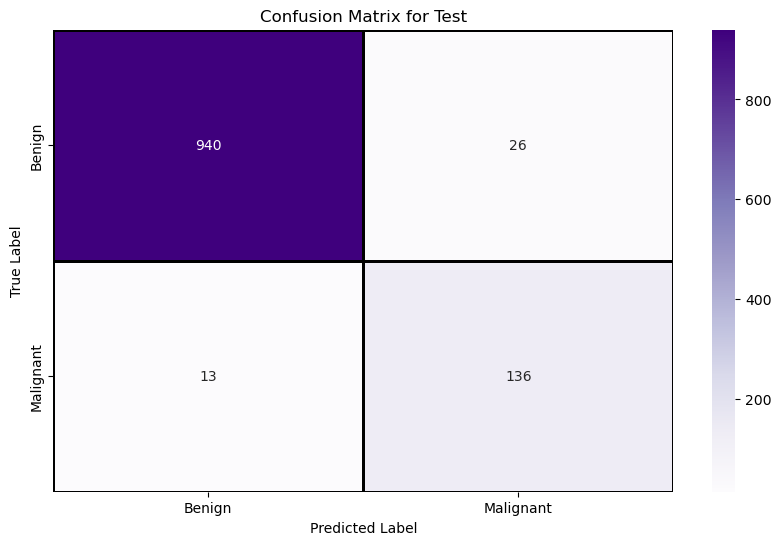

In [130]:
# Plot confusion matrix using seaborn heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Purples",linewidths=1, linecolor='black',
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Test')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Train Report and accuracy

In [128]:
accuracy = accuracy_score(y_train_resampled, y_train_pred)
print(f'Train Accuracy: {accuracy:.4f}')

# Print classification report
print("\nClassification Report:")
print(classification_report(y_train_resampled, y_train_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_train_resampled, y_train_pred))

Accuracy: 0.8939

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      3859
           1       0.98      0.81      0.88      3859

    accuracy                           0.89      7718
   macro avg       0.91      0.89      0.89      7718
weighted avg       0.91      0.89      0.89      7718


Confusion Matrix:
[[3791   68]
 [ 751 3108]]


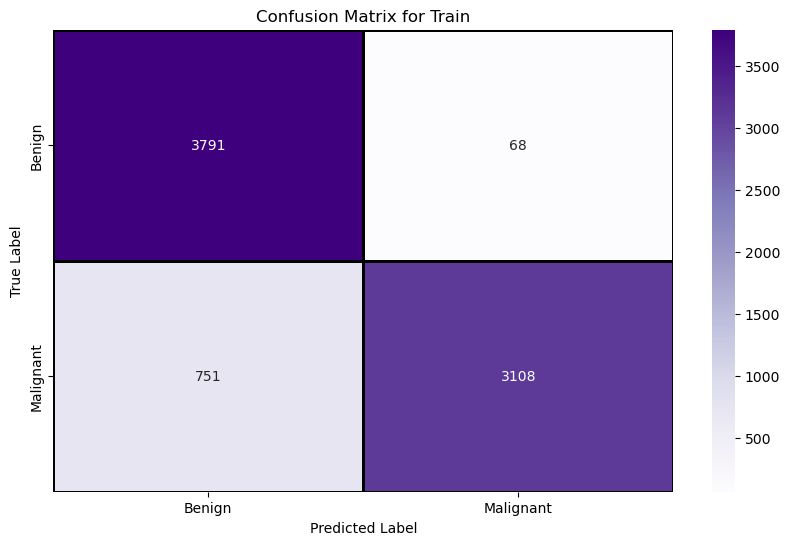

In [139]:
# Plot confusion matrix using seaborn heatmap
cm_t = confusion_matrix(y_train_resampled, y_train_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm_t, annot=True, fmt='d', cmap="Purples",linewidths=1, linecolor='black',
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Train')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()